In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pygal
from collections import Counter
from matplotlib import pyplot as plt
from IPython.display import SVG, HTML, display

In [2]:
dataset_name = 'train'

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [8]:
clickout_item_action_count = len(df[df['action_type'] == 'clickout item'])
clickout_item_action_count

1586586

In [9]:
# sessions per user
sessions_per_user_df = df[['user_id', 'session_id']].drop_duplicates().groupby('user_id').count()

In [10]:
session_count_df = pd.DataFrame.from_dict(Counter(sessions_per_user_df['session_id']), orient='index')
session_count_df = session_count_df.sort_index().rename(columns={0: 'user_count'})
session_count_df.index.name = 'session_count'
session_count_df

,user_count
session_count,
1,610601
2,86211
3,21180
4,7158
5,2828
6,1315
7,576
8,361
9,201


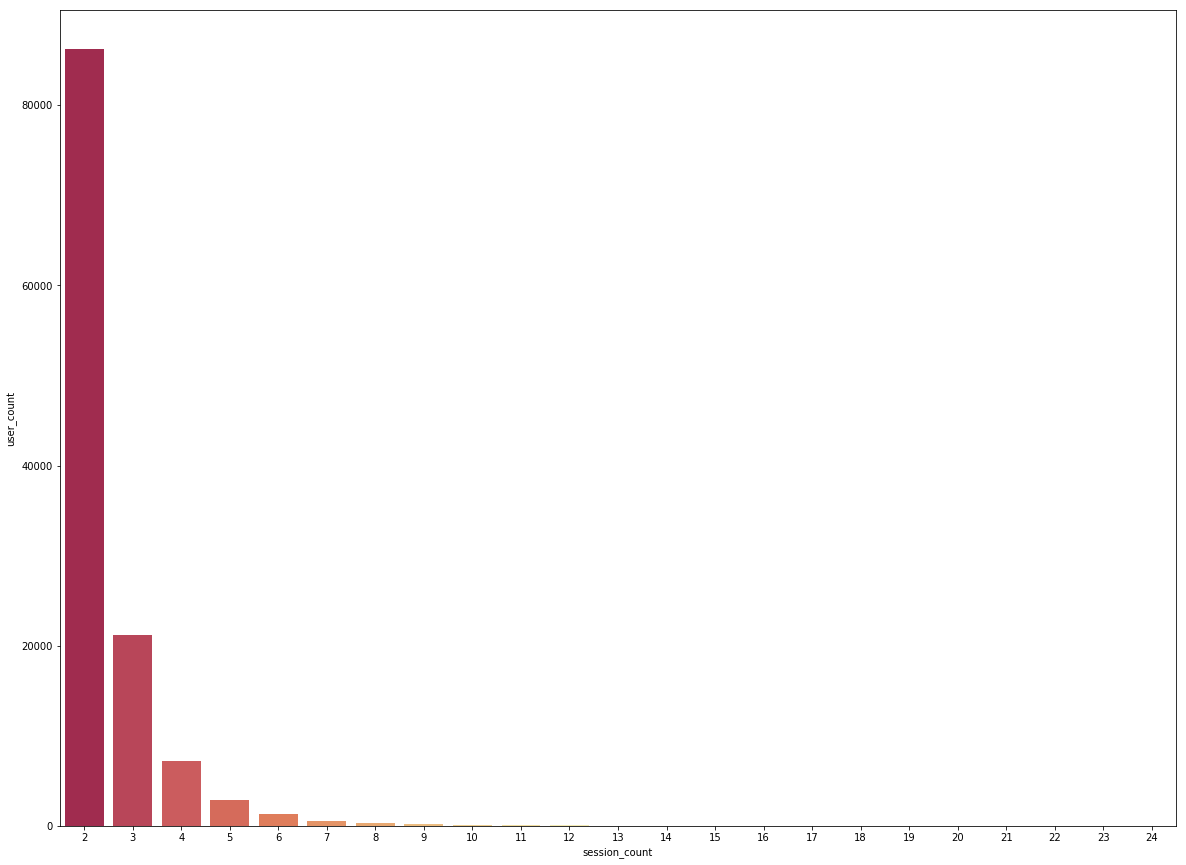

In [11]:
plt.figure(2, figsize=(20,15))
sns.barplot(x='session_count',y='user_count', data=session_count_df.drop([1, 51, 201]).reset_index(), palette='Spectral')

In [12]:
# clickouts per session
df_clickouts_per_session = df[df['action_type'] == 'clickout item']['session_id'].value_counts()
session_ids_with_clickout = set(df_clickouts_per_session.index)

all_unique_session_ids = set(df['session_id'].unique())
session_ids_without_clickout = all_unique_session_ids.difference(session_ids_with_clickout)

print('Number of unique sessions: {}'.format(len(all_unique_session_ids)))
print('Sessions WITH a "clickout item" action: {}'.format(len(session_ids_with_clickout)))
print('Sessions WITHOUT a "clickout item" action: {}'.format(len(session_ids_without_clickout)))
print('Percentage of sessions WITHOUT a "clickout item" action: {}'.format(
    len(session_ids_without_clickout) / len(all_unique_session_ids)
))

Number of unique sessions: 910683
Sessions WITH a "clickout item" action: 826842
Sessions WITHOUT a "clickout item" action: 83841
Percentage of sessions WITHOUT a "clickout item" action: 0.09206386854701362


,number of clickouts in a session,number of sessions
0,1,503008
1,2,165515
2,3,69410
3,4,35037
4,5,18653
5,6,11356
6,7,6968
7,8,4796
8,9,2950
9,10,2218


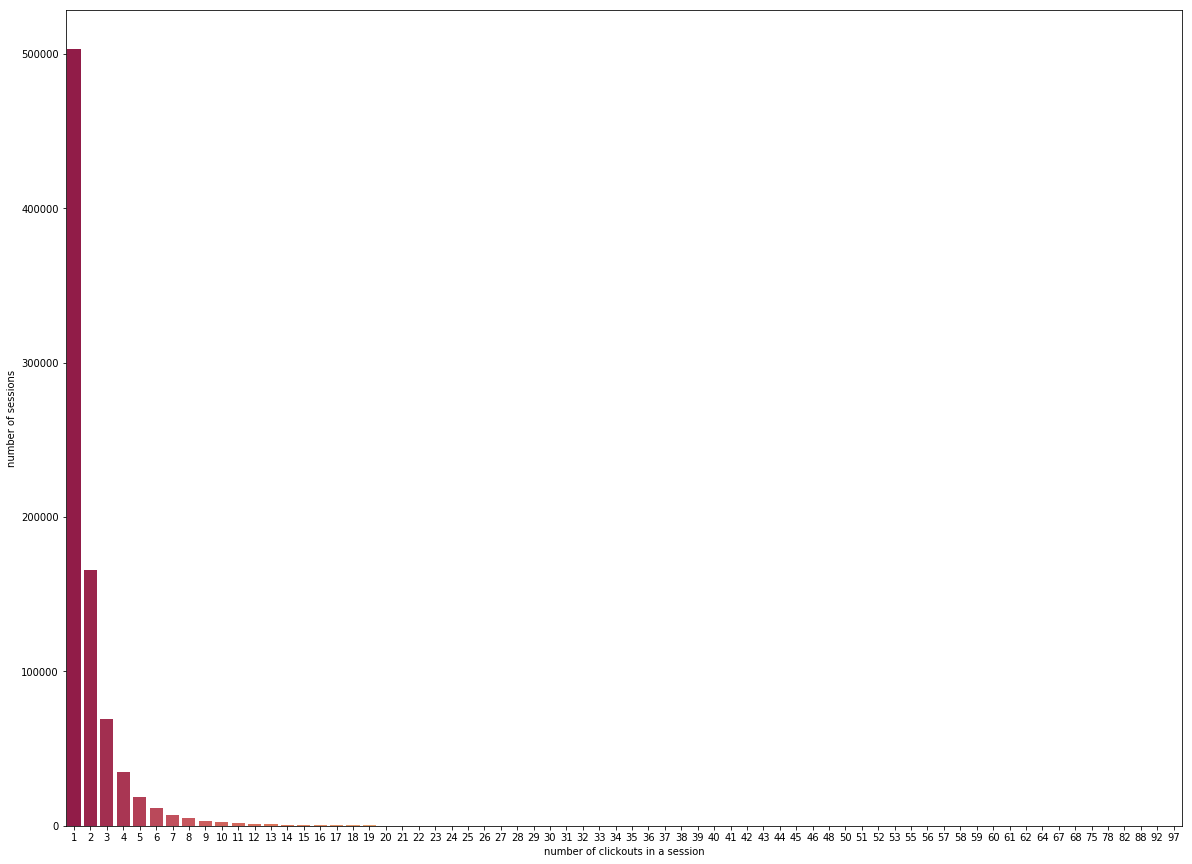

In [13]:
x_label = 'number of clickouts in a session'
y_label = 'number of sessions'

df_clickout_distribution = df_clickouts_per_session.value_counts().reset_index().rename(columns={'index': x_label, 'session_id': y_label})

plt.figure(2, figsize=(20,15))
sns.barplot(
    x=x_label,
    y=y_label,
    data=df_clickout_distribution,
    palette='Spectral'
)

df_clickout_distribution.head(15)

In [17]:
action_types_hist = Counter(df['action_type'])

In [18]:
action_types_df = pd.DataFrame.from_dict(action_types_hist, orient='index').reset_index()
action_types_df = action_types_df.rename(columns={'index': 'action_type', 0: 'count'})
action_types_df = action_types_df.sort_values(by=['count'], ascending=False)
action_types_df

,action_type,count
1,interaction item image,11860750
2,clickout item,1586586
6,filter selection,695917
5,search for destination,403066
9,change of sort order,400584
3,interaction item info,285402
7,interaction item rating,217246
4,interaction item deals,193794
8,search for item,152203
0,search for poi,137444


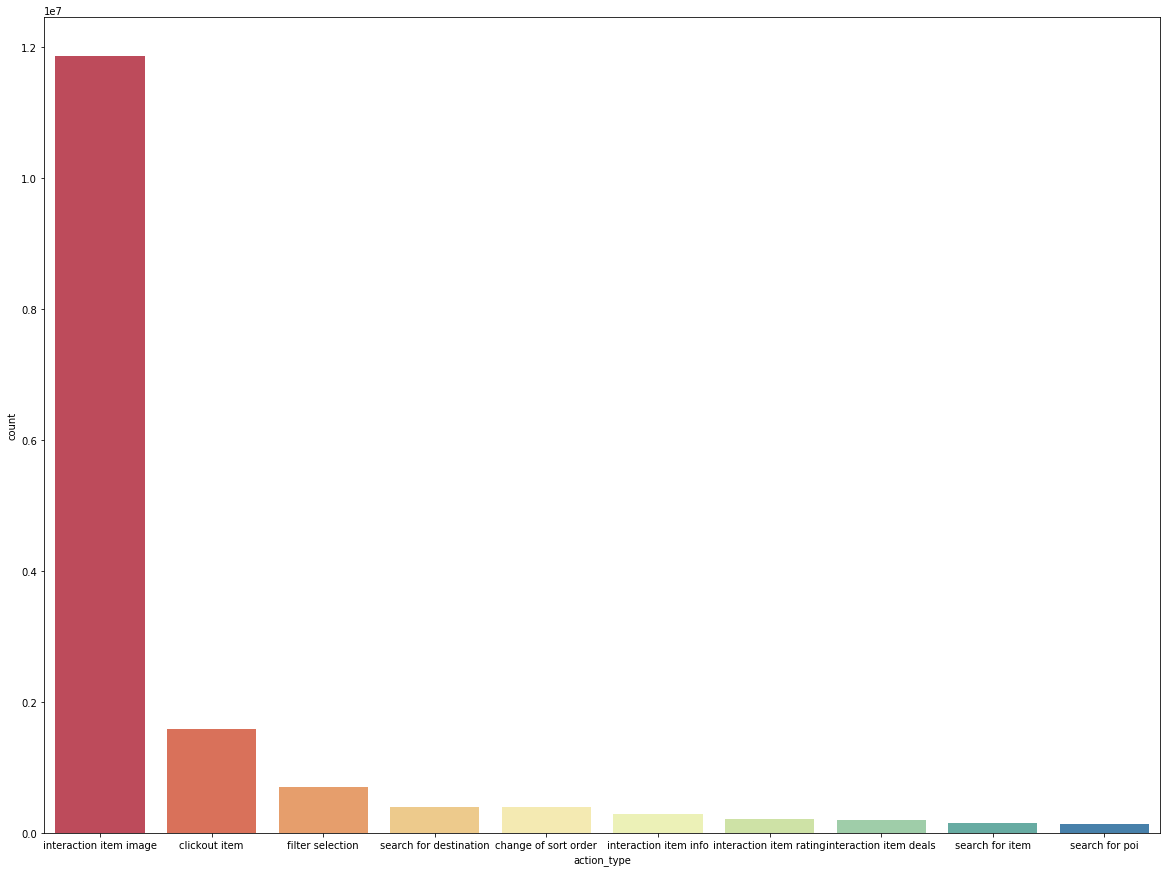

In [19]:
plt.figure(2, figsize=(20,15))
sns.barplot(x='action_type',y='count', data=action_types_df, palette='Spectral')

In [24]:
step_df = pd.DataFrame.from_dict(Counter(df['step']), orient='index').reset_index()
step_df = step_df.rename(columns={'index': 'number_of_steps', 0: 'count'})
step_df['cum_sum'] = step_df['count'].cumsum()
step_df['cum_percentage'] = 100 * (step_df['cum_sum'] / step_df['count'].sum())
step_df

,number_of_steps,count,cum_sum,cum_percentage
0,1,910732,910732,5.716014
1,2,712452,1623184,10.187566
2,3,584269,2207453,13.854604
3,4,490674,2698127,16.934214
4,5,426992,3125119,19.614138
5,6,377810,3502929,21.985381
6,7,342413,3845342,24.134463
7,8,314490,4159832,26.108292
8,9,292139,4451971,27.941839
9,10,274139,4726110,29.662414


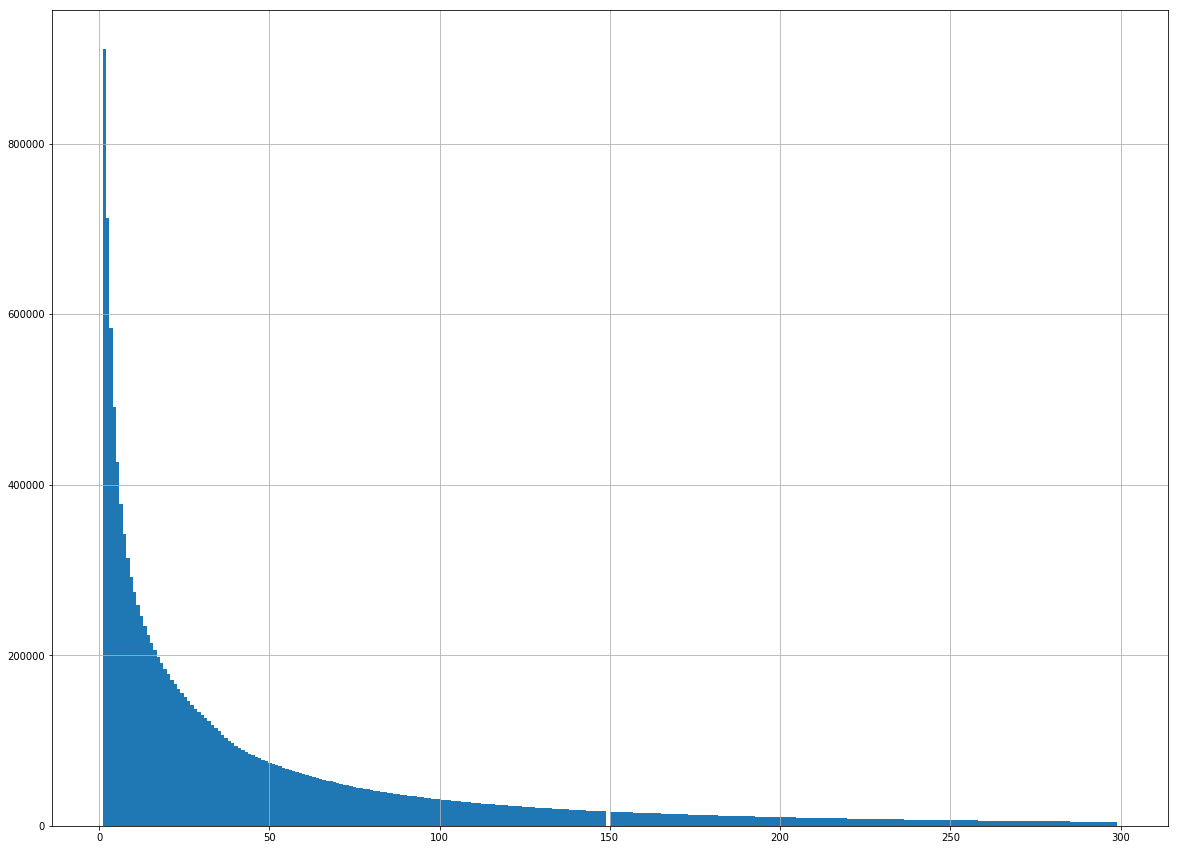

In [25]:
# distribution of number of steps per session

df['step'][df['step'] < 300].hist(bins=300, figsize=(20, 15))

# Hypothesis: Users interact most with the items which they afterwards click out

Thus, **interaction** with items correlates with them being clicked out. We can measure **interaction** in two way:
1. The number of actions which reference an item.
2. The time duration spent interacting with an item.

## Action types with item interaction - the reference value is the item ID

- `clickout item`: user makes a click-out on the item and gets forwarded to a partner website. Other items that were displayed to the user and their associated prices are listed under the ‘impressions’ and ‘prices’ column for this action.
- `interaction item rating`: user interacts with a rating or review of an item.
- `interaction item info`: user interacts with item information.
- `interaction item image`: user interacts with an image of an item.
- `interaction item deals`: user clicks on the view more deals button.
- `search for item`: user searches for an accommodation.

## Number of actions which reference the clicked out item

In [31]:
action_types_hist = Counter(df['action_type'])
action_types_hist

Counter({'search for poi': 137444,
         'interaction item image': 11860750,
         'clickout item': 1586586,
         'interaction item info': 285402,
         'interaction item deals': 193794,
         'search for destination': 403066,
         'filter selection': 695917,
         'interaction item rating': 217246,
         'search for item': 152203,
         'change of sort order': 400584})

In [32]:
interaction_action_types = {
    'clickout item',
    'interaction item rating',
    'interaction item info',
    'interaction item image',
    'interaction item deals',
    'search for item'
}

In [36]:
# all interaction actions have a reference to an item in the train data set

df_interactions = df[df['action_type'].isin(interaction_action_types)]

print('Percentage of interaction actions: {}'.format(
    len(df_interactions) / len(df)
))

Percentage of interaction actions: 0.89725652281756


In [43]:
df_interactions.set_index(keys=['session_id', 'step']).head(100)

user_id   timestamp             action_type  \
session_id    step                                                     
aff3928535f48 2     00RL8Z82B2Z1  1541037522  interaction item image   
              3     00RL8Z82B2Z1  1541037522  interaction item image   
              4     00RL8Z82B2Z1  1541037532  interaction item image   
              5     00RL8Z82B2Z1  1541037532  interaction item image   
              6     00RL8Z82B2Z1  1541037532  interaction item image   
              7     00RL8Z82B2Z1  1541037532  interaction item image   
              8     00RL8Z82B2Z1  1541037532  interaction item image   
              9     00RL8Z82B2Z1  1541037542  interaction item image   
              10    00RL8Z82B2Z1  1541037542  interaction item image   
              11    00RL8Z82B2Z1  1541037542  interaction item image   
              12    00RL8Z82B2Z1  1541037542  interaction item image   
              13    00RL8Z82B2Z1  1541037542  interaction item image   
              14    00RL8Z82B2Z1  1541037543           clickout item   
              16    00RL8Z82B2Z1  1541038485           clickout item   
fa3a53156ae5c 1     02HGRBA06ODU  1541030832   interaction item info   
              2     02HGRBA06ODU  1541030843  interaction item image   
              3     02HGRBA06ODU  1541030843  interaction item image   
              4     02HGRBA06ODU  1541030852   interaction item info   
              5     02HGRBA06ODU  1541030867   interaction item info   
              6     02HGRBA06ODU  1541030877  interaction item image   
              7     02HGRBA06ODU  1541030877  interaction item image   
              8     02HGRBA06ODU  1541030887  interaction item image   
              9     02HGRBA06ODU  1541030887  interaction item image   
              10    02HGRBA06ODU  1541030887  interaction item image   
              11    02HGRBA06ODU  1541030897  interaction item image   
              12    02HGRBA06ODU  1541030897  interaction item image   
              13    02HGRBA06ODU  1541030897  interaction item image   
              14    02HGRBA06ODU  1541030897  interaction item image   
              15    02HGRBA06ODU  1541030897  interaction item image   
              16    02HGRBA06ODU  1541030908  interaction item image   
...                          ...         ...                     ...   
              57    02HGRBA06ODU  1541031098  interaction item image   
              58    02HGRBA06ODU  1541031108  interaction item image   
              59    02HGRBA06ODU  1541031108  interaction item image   
              60    02HGRBA06ODU  1541031108  interaction item image   
              61    02HGRBA06ODU  1541031108  interaction item image   
              62    02HGRBA06ODU  1541031108  interaction item image   
              63    02HGRBA06ODU  1541031108  interaction item image   
              64    02HGRBA06ODU  1541031108  interaction item image   
              65    02HGRBA06ODU  1541031115  interaction item image   
3599a6f709eab 1     02SRUT1NQYH1  1541063730  interaction item image   
              2     02SRUT1NQYH1  1541063730  interaction item image   
              3     02SRUT1NQYH1  1541063740  interaction item image   
              4     02SRUT1NQYH1  1541063740  interaction item image   
              5     02SRUT1NQYH1  1541063740  interaction item image   
              6     02SRUT1NQYH1  1541063750  interaction item image   
              7     02SRUT1NQYH1  1541063760  interaction item image   
              8     02SRUT1NQYH1  1541063760  interaction item image   
              9     02SRUT1NQYH1  1541063760  interaction item image   
              10    02SRUT1NQYH1  1541063770  interaction item image   
              11    02SRUT1NQYH1  1541063770  interaction item image   
              12    02SRUT1NQYH1  1541063770  interaction item image   
              13    02SRUT1NQYH1  1541063770  interaction item image   
              14    02SRUT1NQYH1  1541063770  interaction item im

In [42]:
df_interactions.head(100)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
5,00RL8Z82B2Z1,aff3928535f48,1541037532,6,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
6,00RL8Z82B2Z1,aff3928535f48,1541037532,7,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
7,00RL8Z82B2Z1,aff3928535f48,1541037532,8,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
8,00RL8Z82B2Z1,aff3928535f48,1541037542,9,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
9,00RL8Z82B2Z1,aff3928535f48,1541037542,10,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
10,00RL8Z82B2Z1,aff3928535f48,1541037542,11,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


## Research Questions for Item Interactions

1. What percentage of the actions in a single session are interactions with the click out item? Compute this for each session and visualize it.
2. Is the clickout item the most interacted with? I.e., what is the percentage of sessions whose clickout item is the most interacted with?
3. In the sessions where the clickout item is not the most interacted with, what is the interaction rank of the clickout item? I.e. compute the interaction rank of the clickout item.
    - where **interaction rank** is the rank of the item in the ranking of the items with which the user has interacted the most.